In [1]:
import nltk
import json

In [2]:
from tqdm import tqdm

In [3]:
file_d = []
reviews_sent = []
reviews_neg_sent = []
reviews_pos_sent = []
reviews_str = ""
reviews_pos_str = ""
reviews_neg_str = ""

In [4]:
file = '/Users/gkhanna/Downloads/reviews_Home_and_Kitchen_5.json'

Reading "count" of the file for faster experiments
count = 0 pulls in all data

In [5]:
# Reading count number of JSON lines from the file
count = 0
n = 0
with open(file, "r") as f:
    for line in tqdm(f):
        file_d.append(json.loads(line))
        n =  n + 1
        if count > 0 and n == count:
            break
    


551682it [00:07, 72130.76it/s]


In [6]:
# Checking the structures
print(len(file_d))
print(type(file_d))
print(file_d[0])
print(type(file_d[0]))

551682
<class 'list'>
{'reviewerID': 'APYOBQE6M18AA', 'asin': '0615391206', 'reviewerName': 'Martin Schwartz', 'helpful': [0, 0], 'reviewText': 'My daughter wanted this book and the price on Amazon was the best.  She has already tried one recipe a day after receiving the book.  She seems happy with it.', 'overall': 5.0, 'summary': 'Best Price', 'unixReviewTime': 1382140800, 'reviewTime': '10 19, 2013'}
<class 'dict'>


In [7]:
print(file_d[0]['reviewText'])

My daughter wanted this book and the price on Amazon was the best.  She has already tried one recipe a day after receiving the book.  She seems happy with it.


Read in reviews that correspond to the list of ASIN's (Amazon product ID's) selected. 
Choosing the ASIN that has ~ 1000 reviews from the EDA

In [8]:
# ASIN corresponding to the Iron Skillet
pl = ['B00006JSUA']

In [9]:
# ASIN's for Iron Skillets from Jey's web scraping
# pl = ['B075MRX5N3', 'B06XT6GZ9V', 'B00006JSUA', 'B00006JSUA', 'B07GKZXS2T', 'B000VTOG78', 'B00X4WQMAS', 'B00G2XGC88', 'B073Q8P6CQ', 'B073Q8DY3F']

In [10]:
# Trying out the ASIN's for toothbrush holder
# pl = ['B078GVMVRH', 'B078GVH2VJ', 'B00SX07354', 'B00CC6XSRC', 'B0777SKKBL', 'B072YVWBXH', 'B01AKGRTUM', 'B07CMHRZRT', 'B07CMHRZS2', 'B073Q58L6Q']

In [11]:
# Getting the reviews out of the dictionary into lists
count = 200
n = 0
for r in tqdm(file_d):
    if r['asin'] in pl:
        reviews_sent.append(r['reviewText'])
        if ((r['overall'] == 1.0) or (r['overall'] == 2.0)):
            reviews_neg_sent.append(r['reviewText'])
        else:
            reviews_pos_sent.append(r['reviewText'])
        n =  n + 1
        if count > 0 and n == count:
            break

  0%|          | 0/551682 [00:00<?, ?it/s]


In [12]:

print(len(reviews_sent))
print(reviews_sent[0])

200
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.


In [13]:
print(len(reviews_pos_sent))
print(reviews_pos_sent[0])

193
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.


In [14]:
print(reviews_pos_sent[1])

This is an absolutely amazing skillet!!  I use it ALL the time!!  I re-season it a bit as well to keep it going strong!


In [ ]:
print(len(reviews_neg_sent))
print(reviews_neg_sent[0])

In [ ]:
# Had to install space and neuralcoref
import spacy # version 2.1.3
import neuralcoref # version 4.0
from textblob import TextBlob

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def extractSubjective(review):
    """
    Input: entire review document (str)
    Output: shortened review document with only subjective sentences
    """
    sent_list = nltk.sent_tokenize(review)
    output = ""  # output string
    for sent in sent_list:
        result = TextBlob(sent)
        if result.sentiment[1] > 0.20:  # keep sentences with sentiment > 0.25
            output += sent+"  "
    return output


# spacy
def replacePronouns(review):
    """
    Input: entire review document (str), multiple sentence_scores
    Output: string, modified review with pronouns replaced.
    """

    # create spacy model
    # nlp = spacy.load('en_core_web_sm')
    # add neuralcoref to spacy model
    neuralcoref.add_to_pipe(nlp, greedyness=0.50, max_dist=75)

    pn = nlp(review)  # pn = pronoun doc
    # print("has coreferences?  {}".format(pn._.has_coref))
    # print("Coreferences:")
    # print(pn._.coref_clusters)

    return pn._.coref_resolved


In [ ]:
# Experiments on the reviews
extractSubjective(reviews_sent[0])

In [ ]:
extractSubjective(reviews_neg_sent[0])

In [ ]:
# replacePronouns(reviews_neg_sent[0])

In [15]:
# Getting reviews into strings
reviews_str = "".join(s for s in reviews_sent)


In [16]:
reviews_pos_str = "".join(s for s in reviews_pos_sent)
reviews_neg_str = "".join(s for s in reviews_neg_sent)

In [ ]:
print(len(reviews_str))
print(len(reviews_pos_str))
print(len(reviews_neg_str))

In [17]:
print(reviews_str[:100])
print(reviews_pos_str[:100])
print(reviews_neg_str[:100])

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c
I've always bought the regular Lodge skillets and loved them.  Went with the pre-seasoned this time 


Summarizing before doing anything else with the review strings
We'll skip summarization as there's danger of losing information

In [ ]:
from gensim.summarization import summarize

In [ ]:
# reviews_str = summarize(reviews_str, ratio=.5)

In [ ]:
print(len(reviews_str))
print(reviews_str[:100])

In [ ]:
# reviews_pos_str = summarize(reviews_pos_str)
# reviews_neg_str = summarize(reviews_neg_str)

In [18]:
print(len(reviews_pos_str))
print(reviews_pos_str[:100])
print(len(reviews_neg_str))
print(reviews_neg_str[:100])

105966
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c
2995
I've always bought the regular Lodge skillets and loved them.  Went with the pre-seasoned this time 


Separating out sentences into a list
PunktSentenceTokenizer is customized to separate sentences on a few extra words and characters as wel

In [19]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktLanguageVars
'''We customize the ReviewLangVars class to separate sentences based on some additional keywords'''


class ReviewLangVars(PunktLanguageVars):
    sent_end_chars = ('pros:', 'cons:', '[','][','.','?','!')
    
sent_tokenizer1 = PunktSentenceTokenizer(lang_vars = ReviewLangVars())
# sent_tokenizer1 = PunktSentenceTokenizer()
sent_fullreview = sent_tokenizer1.tokenize(reviews_str)
sent_neg_review = sent_tokenizer1.tokenize(reviews_neg_str)
sent_pos_review = sent_tokenizer1.tokenize(reviews_pos_str)

In [20]:
# This are the original sentences tokenized
print(sent_fullreview[0])
print(sent_fullreview[:5])
print(len(sent_fullreview))

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.This is an absolutely amazing skillet!!
['Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.This is an absolutely amazing skillet!!', 'I use it ALL the time!!', "I re-season it a bit as well to keep it going strong!I've always bought the regular Lodge skillets and loved them.", 'Went with the pre-seasoned this time because I wanted this size.Wow, what a pain.', "I picked the best I could find from a stack on a big-box store shelf, so I know I didn't get a lemon (unless the whole batch was badly pre-seasoned!)."]
1051


In [21]:
# This are the negative sentences tokenized
print(sent_neg_review[0])
print(sent_neg_review[:5])
print(len(sent_neg_review))

I've always bought the regular Lodge skillets and loved them.
["I've always bought the regular Lodge skillets and loved them.", 'Went with the pre-seasoned this time because I wanted this size.Wow, what a pain.', "I picked the best I could find from a stack on a big-box store shelf, so I know I didn't get a lemon (unless the whole batch was badly pre-seasoned!).", 'The coating flaked off, got my hands black, and smelled really rusty.', 'No WAY I could cook with it that way!It has taken me about five rounds of boiling soapy water and then vinegar and water to get most of that nasty coating off of there with a steel scurbber.']
29


In [22]:
# This are the positive sentences tokenized
print(sent_pos_review[0])
print(sent_pos_review[:5])
print(len(sent_pos_review))

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.This is an absolutely amazing skillet!!
['Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.This is an absolutely amazing skillet!!', 'I use it ALL the time!!', 'I re-season it a bit as well to keep it going strong!So far I am loving this skillet!', "It's priced well and you can tell it is good quality.", "I've used it to make a skillet cookie, asparagus, and saute shrimp (not all at the same time!)."]
1023


Extracting common Items using apriori
https://github.com/asaini/Apriori

In [23]:
import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
        """calculates the support for items in the itemSet and returns a subset
       of the itemSet each of whose elements satisfies the minimum support"""
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        """Join a set with itself and returns the n-element itemsets"""
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)

    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            """local function which Returns the support of an item"""
            return float(freqSet[item])/len(transactionList)

    toRetItems = []
    for key, value in tqdm(list(largeSet.items())):
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in tqdm(list(largeSet.items())[1:]):
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


def printResults(items):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item, support in sorted(items, key=lambda item_support: item_support[1], reverse=True):
        print(str(item), support)

In [89]:
# Utility functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

lem = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
lem_word_mapping = {}

# Find leaves of a tree
def leaves(tree):
    """Finds leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label() in ['P1','P2','P3','P4','P5','P6','P7','P8', 'P9', 'P10']):
        yield subtree.leaves()
    
def stem(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = word.replace("'","").replace('"','').replace('.','')
    word1 = stemmer.stem(word)
    return word1

# lowercase, stem and lemmatize
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word1 = stemmer.stem(word)
    word2 = lem.lemmatize(word1)
    if word != word2:
        lem_word_mapping[word2] = word
    return word2

def acceptableWord(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool((2 <= len(word) <= 40) and word.lower() not in stopwords)
    return accepted

# extract words after normalizing and checking if acceptable
def getTerms(tree):
    """Returns the words after checking acceptable conditions, normalizing and lemmatizing"""
    term = [ stem(w) for w in tree if acceptableWord(w) ]
    return term
    
def getNorm(tree):
    """Parse leaves in chunk and return after checking acceptable conditions, normalizing and lemmatizing"""
    for leaf in leaves(tree):
        term = [ normalise(w) for w,t in leaf if acceptableWord(w) ]
        yield term

Set of nouns for each sentence

In [25]:
# Set of nouns for the apriori algorithm

def isNoun(n):
    if n=='NN' or n=='NNS' or n=='NNP' or n=='NNPS':
        return True

revset=[]
for line in tqdm(sent_fullreview):
    # print(line)
    a = nltk.word_tokenize(line)
    # print(a)
    nouns = [word for (word, pos) in nltk.pos_tag(a) if isNoun(pos)] 
    # print(nouns)
    terms = getTerms(nouns)
    # print(terms)

    revset.append(terms)



100%|██████████| 1051/1051 [00:01<00:00, 646.96it/s]


In [26]:
print(revset[0])
print(revset[:10])

['treatment', 'stick', 'pan', 'friend', 'size', 'cast', 'iron', 'pan', 'children', 'chemic', 'part', 'pan', 'decadesthi', 'skillet']
[['treatment', 'stick', 'pan', 'friend', 'size', 'cast', 'iron', 'pan', 'children', 'chemic', 'part', 'pan', 'decadesthi', 'skillet'], ['time'], ['bit', 'lodg', 'skillet'], ['went', 'time', 'sizewow', 'pain'], ['stack', 'store', 'shelf', 'lemon', 'batch'], ['coat', 'hand'], ['way', 'way', 'round', 'water', 'vinegar', 'water', 'steel', 'scurbber'], ['oil', 'heat', 'oven', 'minutesi', 'residu'], ['rust', 'coat', 'skillet', 'garag'], ['iron']]


In [ ]:
len(revset)

Extracting the items contained in the reviews

In [27]:
items, rules = runApriori(revset, 0.1, 0.1)
printResults(items)

100%|██████████| 1/1 [00:00<00:00, 4766.25it/s]

('skillet',) 0.22359657469077068
('pan',) 0.1988582302568982
('iron',) 0.18173168411037108
('cast',) 0.1379638439581351
('cast', 'iron') 0.1351094196003806


Polarity of the sentences, conventional Liu and Hu Opinion Lexicon
TBD: We may want to substitute with a more advanced sentiment detection algorithm

In [28]:
def custom_liu_hu_lexicon(sentence):
    '''Takes in a sentence and returns the sentiment of the sentence by counting the no of positive and negitive 
    and negitive words and by reversing the sentiment if the words NO or NOT are present
    '''
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) 
    y = []
    isNegation = False
    negationWords = ['no','not','never','none','hardly','rarely','scarcely']

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1) # negative
        else:
            y.append(0) # neutral
            
        if word in negationWords:
            isNegation = True

    if pos_words > neg_words and isNegation==True:
        return 'neg'
    elif pos_words > neg_words:
        return 'pos'
    elif pos_words < neg_words and isNegation==True:
        return 'pos'
    elif pos_words < neg_words:
        return 'neg'
    elif pos_words == neg_words:
        return 'neutral'

In [29]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [30]:
# Extracting sentiments from the positive reviews
neutral_review=[]
positive_review=[]
negative_review=[]

for sentence in tqdm(sent_pos_review):
    for i in items:
        if i[0][0] in sentence:
            #print(i[0][0] +"--" + sentence)
            x=custom_liu_hu_lexicon(sentence)
            if(x=="pos"):
                positive_review.append(sentence)
            elif(x=="neg"):
                negative_review.append(sentence)
            else:
                neutral_review.append(sentence)
            break

# Extracting sentiments from the negative reviews
for sentence in tqdm(sent_neg_review):
    for i in items:
        if i[0][0] in sentence:
            #print(i[0][0] +"--" + sentence)
            x=custom_liu_hu_lexicon(sentence)
            if(x=="pos"):
                positive_review.append(sentence)
            elif(x=="neg"):
                negative_review.append(sentence)
            else:
                neutral_review.append(sentence)
            break
            
print('done')

100%|██████████| 29/29 [00:06<00:00,  4.24it/s]

done


In [ ]:
print(positive_review[:5])

In [ ]:
print(negative_review[:5])

In [ ]:
print(neutral_review[:5])

In [31]:
print(positive_review[1])

!If you are familiar with cast-iron, and are willing to give it the minimal care it requires, you'll love this.


In [35]:
# Convert all sentences into tokens/words
all_sen_tok = []
for sentence in tqdm(sent_fullreview):
    all_sen_tok.append(nltk.word_tokenize(sentence))

100%|██████████| 1051/1051 [00:00<00:00, 5795.90it/s]


In [32]:
# Convert positive, negative and neutral sentences into tokens/words
pos_sen_tok = []
neg_sen_tok = []
neutral_sen_tok = []
for sentence in tqdm(positive_review):
    pos_sen_tok.append(nltk.word_tokenize(sentence))
for sentence in tqdm(negative_review):
    neg_sen_tok.append(nltk.word_tokenize(sentence))
for sentence in tqdm(neutral_review):
    neutral_sen_tok.append(nltk.word_tokenize(sentence))    

100%|██████████| 147/147 [00:00<00:00, 3888.59it/s]


In [ ]:
print(all_sen_tok[0])
print(pos_sen_tok[:2])
print(neg_sen_tok[0])

In [33]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
# Gave an error without downloading the nltk averaged_perceptron_tagger
# Find POS tags for all the sentences
all_sen_tok_tagged = []
for sentence_t in tqdm(all_sen_tok):
    all_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))

100%|██████████| 1051/1051 [00:01<00:00, 975.81it/s]


In [37]:
# Gave an error without downloading the nltk averaged_perceptron_tagger
# Find POS tags for positive, negative and neutral sentences
pos_sen_tok_tagged = []
neg_sen_tok_tagged = []
neutral_sen_tok_tagged = []
for sentence_t in tqdm(pos_sen_tok):
    pos_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))
for sentence_t in tqdm(neg_sen_tok):
    neg_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))
for sentence_t in tqdm(neutral_sen_tok):
    neutral_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))

100%|██████████| 147/147 [00:00<00:00, 926.88it/s]


In [38]:
print(all_sen_tok_tagged[0])

[('Just', 'RB'), ('say', 'VB'), ('no', 'UH'), ('to', 'TO'), ('chemical', 'VB'), ('treatments', 'NNS'), ('on', 'IN'), ('non', 'JJ'), ('stick', 'NN'), ('pans', 'NNS'), (',', ','), ('get', 'VB'), ('yourself', 'PRP'), ('and', 'CC'), ('your', 'PRP$'), ('friends', 'NNS'), ('a', 'DT'), ('few', 'JJ'), ('sizes', 'NNS'), ('of', 'IN'), ('cast', 'NN'), ('iron', 'NN'), ('and', 'CC'), ('have', 'VBP'), ('pans', 'NNS'), ('that', 'IN'), ('you', 'PRP'), ('can', 'MD'), ('pass', 'VB'), ('down', 'RP'), ('to', 'TO'), ('your', 'PRP$'), ('children', 'NNS'), (',', ','), ('without', 'IN'), ('all', 'PDT'), ('those', 'DT'), ('unknown', 'JJ'), ('chemicals', 'NNS'), ('that', 'WDT'), ('are', 'VBP'), ('such', 'PDT'), ('a', 'DT'), ('part', 'NN'), ('of', 'IN'), ('pans', 'NNS'), ('for', 'IN'), ('the', 'DT'), ('last', 'JJ'), ('few', 'JJ'), ('decades.This', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('absolutely', 'RB'), ('amazing', 'JJ'), ('skillet', 'NN'), ('!', '.'), ('!', '.')]


In [39]:
print(neg_sen_tok_tagged[0])

[('I', 'PRP'), ('read', 'VBP'), ('a', 'DT'), ('3-star', 'JJ'), ('review', 'NN'), ('complaining', 'VBG'), ('that', 'IN'), ('the', 'DT'), ('pan', 'NN'), ('rusts', 'VBZ'), ('if', 'IN'), ('water', 'NN'), ('is', 'VBZ'), ('left', 'VBN'), ('in', 'IN'), ('it', 'PRP'), ('!', '.')]


Extract phrases that talk about features and associated sentiment/opinion

In [90]:
# Patterns that we want to extract
# We think these are the ones that contain features
feature_patterns = r"""       
    P1:{<JJ><NN|NNS>}
    P2:{<JJ><NN|NNS><NN|NNS>}
    P3:{<RB|RBR|RBS><JJ>}
    P4:{<RB|RBR|RBS><JJ|RB|RBR|RBS><NN|NNS>}
    P5:{<RB|RBR|RBS><VBN|VBD>}
    P6:{<RB|RBR|RBS><RB|RBR|RBS><JJ>}
    P7:{<VBN|VBD><NN|NNS>}
    P8:{<VBN|VBD><RB|RBR|RBS>}
    P9:{<NN.*|JJ>*<NN.*>}
    P10:
        {<P9>}
        {<P9><IN><P9>} # Above, connected with in, of, etc
"""

In [ ]:
# Alternate feature patterm for experiment
# grammar = "NP:{<dt|pp|cd>?<jj||jjr|jjs>*<nn|nns|prp|nnp|in|prp\$>+<vbd|vbz|vbn|vbp|in>*<jj|rb>*<prp|nn|nns>*}"

In [75]:
# Alternate feature patterm for experiment
grammar = r"""
    P1:{<dt|pp|cd>?<jj||jjr|jjs>*<nn|nns|prp|nnp|in|prp\$>+<vbd|vbz|vbn|vbp|in>*<jj|rb>*<prp|nn|nns>*}
        """

In [85]:
grammar = r"""
        P1:
            {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

        p2:
            {<P1>}
            {<P1><IN><P1>} # Above, connected with in, of, etc
        """


In [ ]:
# grammar1 = "P1:{(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}"

In [ ]:
len(revset)

Utility functions

In [40]:
def getTerms1(tree):
    """Returns the words after checking acceptable conditions, normalizing and lemmatizing"""
    term = [ normalise(w) for w in tree if acceptable_word(w) ]
    yield term

In [76]:
# Extract feature phrases with ngram rules
def extractFeaturePhrases(tagged, feature_patterns):
    out = []
    for phrase in tqdm(tagged):
        r_parser = nltk.RegexpParser(feature_patterns)
        chunk_2 = r_parser.parse(phrase)
        term = getNorm(chunk_2)
        
        for ter in term:
            word_concat = ""
            for word in ter:
                word_concat = word_concat + " " + word
                
            if (len(ter) > 1):
                out.append(word_concat)
        
    return out
 

In [91]:
extracted = extractFeaturePhrases(all_sen_tok_tagged, feature_patterns )

100%|██████████| 1051/1051 [00:01<00:00, 852.79it/s]


In [93]:
extracted = extractFeaturePhrases(all_sen_tok_tagged, feature_patterns)
extracted_pos = extractFeaturePhrases(pos_sen_tok_tagged, feature_patterns)
extracted_neg = extractFeaturePhrases(neg_sen_tok_tagged, feature_patterns)    

100%|██████████| 133/133 [00:00<00:00, 715.54it/s]


In [92]:
print(extracted[:20])

[' non stick', ' cast iron', ' cast iron', ' unknown chemic', ' amaz skillet', ' alway bought', ' regular lodg skillet', ' regular lodg skillet', ' big-box store', ' whole batch', ' badli pre-season', ' realli rusti', ' soapi water', ' steel scurbber', ' steel scurbber', ' still wari', ' much rust', ' badli store', ' good old american-mad lodg skillet', ' good old american-mad lodg skillet']


In [94]:
print(extracted_neg[:10])

[' 3-star review', ' garbag spray lodg', ' garbag spray lodg', ' nice piec', ' cast iron', ' cast iron', ' virtuli non-stick', ' iron ware', ' iron ware', ' pan heat']


Find out the most common ones, frequency distribution

In [95]:
freqdist = nltk.FreqDist(word for word in extracted)

In [96]:
type(freqdist)

nltk.probability.FreqDist

In [97]:
most_common = freqdist.most_common()
print(most_common[:20])

[(' cast iron', 162), (' cast iron skillet', 50), (' iron skillet', 29), (' paper towel', 20), (' lodg logic', 16), (' inch skillet', 14), (' iron pan', 12), (' hot water', 10), (' cast iron pan', 10), (' oliv oil', 9), (' cook surfac', 9), (' pork chop', 8), (' perfect size', 8), (' corn bread', 8), (' lodg skillet', 8), (' cast iron cookwar', 8), (' stainless steel', 8), (' fri pan', 8), (' non stick', 7), (' high qualiti', 7)]


In [100]:
freqdist.pprint(maxlen = 20)

FreqDist({' cast iron': 162, ' cast iron skillet': 50, ' iron skillet': 29, ' paper towel': 20, ' lodg logic': 16, ' inch skillet': 14, ' iron pan': 12, ' hot water': 10, ' cast iron pan': 10, ' oliv oil': 9, ' cook surfac': 9, ' pork chop': 8, ' perfect size': 8, ' corn bread': 8, ' lodg skillet': 8, ' cast iron cookwar': 8, ' stainless steel': 8, ' fri pan': 8, ' non stick': 7, ' high qualiti': 7, ...})


In [ ]:
print(freqdist.max())

In [ ]:
freq_tab = freqdist.tabulate(7)

In [ ]:
type(freq_tab)

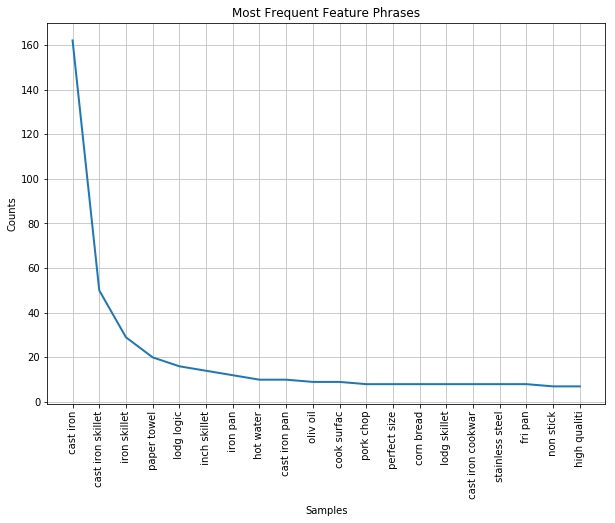

In [99]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

Most common positive and negative phrases

In [101]:
# Positive
freqdist_pos = nltk.FreqDist(word for word in extracted_pos)
most_common_pos = freqdist_pos.most_common()
print(most_common_pos[:10])
print(freqdist_pos.max())
freq_tab_pos = freqdist_pos.tabulate(7)

[(' cast iron', 85), (' cast iron skillet', 30), (' iron skillet', 15), (' iron pan', 6), (' lodg logic', 6), (' cast iron cookwar', 6), (' paper towel', 4), (' season process', 4), (' iron cookwar', 4), (' lodg skillet', 4)]
 cast iron
         cast iron  cast iron skillet       iron skillet           iron pan         lodg logic  cast iron cookwar        paper towel 
                85                 30                 15                  6                  6                  6                  4 


In [102]:
# Negative
freqdist_neg = nltk.FreqDist(word for word in extracted_neg)
most_common_neg = freqdist_neg.most_common()
print(most_common_neg[:10])
print(freqdist_neg.max())
freq_tab_neg = freqdist_neg.tabulate(7)

[(' cast iron', 36), (' cast iron skillet', 12), (' iron skillet', 10), (' lodg logic', 4), (' inch skillet', 4), (' dutch oven', 4), (' fri pan', 4), (' cast iron pan', 4), (' paper towel', 4), (' size pan', 4)]
 cast iron
         cast iron  cast iron skillet       iron skillet         lodg logic       inch skillet         dutch oven            fri pan 
                36                 12                 10                  4                  4                  4                  4 


In [ ]:
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist_neg.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

Unlemmatize and unstem using the dictionary created earlier

In [103]:
import inflect

In [104]:
print(extracted[:10])

[' non stick', ' cast iron', ' cast iron', ' unknown chemic', ' amaz skillet', ' alway bought', ' regular lodg skillet', ' regular lodg skillet', ' big-box store', ' whole batch']


In [105]:
p = inflect.engine()
def replacewords(mc):
    newmc=[]
    for a in tqdm(mc):
        newword="";found=False;
        for b in a[0].split():            
            for x in lem_word_mapping:
                #print(x)
                #print(b)
                if b==x:
                    found=True
                    sing=(lem_word_mapping[x] if p.singular_noun(lem_word_mapping[x])==False else p.singular_noun(lem_word_mapping[x]))
                    if newword=="":
                        newword = newword + sing
                    else:
                        newword = newword + " " +  sing
            if found==False:
                if newword=="":
                    newword = newword + b
                else:
                    newword = newword + " " +  b
                    #print(newword)
        newmc.append((newword,a[1]))
    return newmc

final = replacewords(most_common)
final_pos = replacewords(most_common_pos)
final_neg = replacewords(most_common_neg)

100%|██████████| 242/242 [00:00<00:00, 5467.45it/s]


In [106]:
print("Top Feature Phrases:")
print(final[0])
print(final[:50])
print("Top Positive Feature Phrases:")
print(final_pos[0])
print(final_pos[:50])
print("Top Negative Feature Phrases:")
print(final_neg[0])
print(final_neg[:50])

Top Feature Phrases:
('casting', 162)
[('casting', 162), ('casting skillet', 50), ('iron skillet', 29), ('paper towel', 20), ('lodge', 16), ('inch skillet', 14), ('iron pan', 12), ('hot water', 10), ('casting pan', 10), ('olive oiling', 9), ('cooking surface', 9), ('pork chop', 8), ('perfection size', 8), ('corning bread', 8), ('lodge skillet', 8), ('casting cookware', 8), ('stainless steel', 8), ('frying pan', 8), ('non stick', 7), ('high quality', 7), ('chicken breast', 7), ('non-stick pan', 6), ('medium heating', 6), ('ga stove', 6), ('ground beef', 6), ('lodge product', 6), ('iron cookware', 6), ('extra handle', 5), ('non-stick coating', 5), ('high heating', 5), ('cast-iron skillet', 5), ('size pan', 5), ('cooking egg', 4), ('outdoor grilled', 4), ('food taste', 4), ('inch pan', 4), ('well seasoned', 4), ('alton browning', 4), ('little bit', 4), ('first use', 4), ('first time', 4), ('bacon grease', 4), ('lodge website', 4), ('room temperature', 4), ('seasoned', 4), ('first casting'

We'll find out the opinions corresponding to the most common features.
Its a simple search in a bunch of lists/files at this point

In [ ]:
def featuresInContext(item_arr, opinion_phrases, sentence_arr ):
    for item,support in tqdm(sorted(item_arr, key=lambda item_support: item_support[1], reverse=True)):
        count = 0
        print("------" + "Item > " + item[0] + "------")
        for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
            pcount = 0
            if normalise(item[0]) in normalise(phrase):
                count+=1
                print("---" + "Phrase > " + phrase + "----")
                for l in sentence_arr:
                    if normalise(phrase) in normalise(l):
                        # print("Debug: " + l)
                        for b in zip(l.split(" ")[:-1], l.split(" ")[1:]):
                            #print(b[0]+" "+b[1])
                            if normalise(b[0])==normalise(item[0]):
                                print("---" + "examplex" + "----")
                                print(l.replace("'","").replace("]","").replace("[",""))
                                pcount+=1
                                break
                            elif (normalise(b[0])+" "+normalise(b[1]))==normalise(item[0]):
                                print("---" + "exampley" + "----")
                                print(l.replace("'","").replace("]","").replace("[",""))
                                pcount+=1
                                break
                        if pcount==4:
                            break                
            if count==4:
                break 
        
# sent_str = ""
# sent_str = sent_str.join(sent_fullreview)
# token_sentences = sent_tokenizer1.tokenize(sent_str)
# featuresInContext(items, final, sent_fullreview)

In [111]:
import time

In [ ]:
print("content" + time.strftime("%Y%m%d-%H%M%S"))

In [ ]:
def featuresInContextA(item_arr, opinion_phrases, sentence_arr ):
    for item,support in tqdm(sorted(item_arr, key=lambda item_support: item_support[1], reverse=True)):
        count = 0
        print("------" + "Item > " + item[0] + "------")
        for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
            pcount = 0
            count+=1
            print("---" + "Phrase > " + str(count) + " >>> " + phrase + "----")
            for l in sentence_arr:
                if (normalise(phrase) in normalise(l)) and (normalise(item[0]) in normalise(l)):
                    pcount+=1
                    print("---" + "example > " + str(pcount) + " >>> " + "----")
                    print(l)
                    if pcount==4:
                        break                
            if count==4:
                break 
        
              

In [109]:
def featuresInContextB(item_arr, opinion_phrases, sentence_arr ):
    # Count of the phrases
    count = 0
    # Latest time in a string
    timestr = time.strftime("%Y%m%d-%H%M%S")
    # Outputfile
    print("File created at: " + timestr)
    output_file_name = "o_" + timestr + ".txt"
    f= open(output_file_name,"a+")
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
        # Count of the number of sentences
        pcount = 0
        count+=1
        f.write("\r\n")
        f.write("---" + "Phrase > " + str(count) + " >>> " + phrase + "----\r\n\r\n")
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                pcount+=1
                f.write("---" + "example > " + str(pcount) + " >>> " + "----\r\n")
                f.write("%s\r\n" %(l))
                if pcount==5:
                    break                
        if count==5:
            break 
    f.close()

Modified to function without the item. Its assumed that the reviews are already constrained by the item in this case

In [ ]:
def featuresInContextC(opinion_phrases, sentence_arr ):
    count = 0
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
        pcount = 0
        count +=1
        print("---" + "Phrase > " + str(count) + " >>> " + phrase + "----")
        for l in sentence_arr:            
            if normalise(phrase) in normalise(l):
                pcount +=1
                print("---" + "example > " + str(pcount) + " >>> " + "----")
                print(l)
                
                if pcount == 4:
                    break
        if count == 4:
            break
              

In [107]:
# Extract sentences with features
from collections import defaultdict
def featuresAndContext(item_arr, opinion_phrases, sentence_arr, phrase_count, sentence_count ):
    """ Extract sentences with features/opinion_phrases
    item_arr is to constrain the context to items under study
    Output is extracted into a file
    Output is also return as a JSON string
    """


    # Latest time in a string
    timestr = time.strftime("%Y%m%d-%H%M%S")

    # Outputfile
    print("File created at: " + timestr)
    output_file_name = "o_" + timestr + ".txt"
    output_json_name = "o_" + timestr + ".json"

    f= open(output_file_name,"a+")

    # Output JSON
    outDict = defaultdict(list)
    outJSON = ''

    p_count = 0
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):

        f.write("\r\n")
        f.write("---" + "Phrase > " + str(p_count) + " >>> " + phrase + "----\r\n\r\n")
        p_count += 1
        s_count = 0
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                f.write("---" + "example > " + str(s_count) + " >>> " + "----\r\n")
                f.write("%s\r\n" %(l))
                outDict[phrase].append(l)
                s_count += 1
                if s_count == sentence_count:
                    break
        if p_count == phrase_count:
            break
    outJSON = json.dumps(outDict, sort_keys = True, indent = 4)
    with open(output_json_name, 'w') as jf:
        json.dump(outDict, jf, sort_keys = True, indent=4)

    f.close()
    return output_file_name, output_json_name, outJSON


In [ ]:
print(len(items))
items_few = items[:2]
print(len(items_few))
print(items_few)

In [ ]:
type(items[0])

In [ ]:
print(items)

Sort by support

In [ ]:
items.sort(key=lambda tup: tup[1], reverse=True) 

In [ ]:
print(items)

In [112]:
featuresInContextB(items, final_pos, sent_pos_review)

File created at: 20190708-145029


In [ ]:
featuresInContextB(items, final_neg, sent_neg_review)

In [108]:
fn, jn, js = featuresAndContext(items, most_common_pos, sent_pos_review, phrase_count = 4, sentence_count = 4 )

NameError: name 'time' is not defined

In [ ]:
type(js)

In [ ]:
print(js)